# Array Configuration Generation
This notebook generates and visualizes various antenna array configurations for FASR using `fasr_solar_simul` (fss).

In [42]:
import fasr_solar_simul as fss
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
import os

# Speed of light in m/s
C_LIGHT = c
import matplotlib
%matplotlib inline

## Set Site Information

In [80]:
# set reference longtitude and latitude
dsa_longitude = -114.425164
dsa_latitude = 39.54780
dsa_altitude = 1736.125

## 3-armed Log Spiral Configurations

Number of turns 1.497372046505208
Minimum baseline length: 18.4 m
Maximum baseline length: 4555.3 m
'generate_log_spiral_antenna_positions' completed at 2026-01-29 10:06:30; runtime: 0.00 seconds
fig saved to fig-fasr_Log_Spiral-72-n_arms=3-antennas_per_arm=24-k=0.43-r0=35.0-r_max=2000.jpg
Set 1: Beam (Natural) FWHM Major: 22.45 arcsec, Minor: 22.73"
Set 1: Beam (Uniform) FWHM Major: 4.81 arcsec, Minor: 4.63"
Set 1: Sidelobe RMS (Natural): 0.8%
Set 1: Sidelobe RMS (Uniform): 1.7%
'plot_all_panels' completed at 2026-01-29 10:06:32; runtime: 2.06 seconds


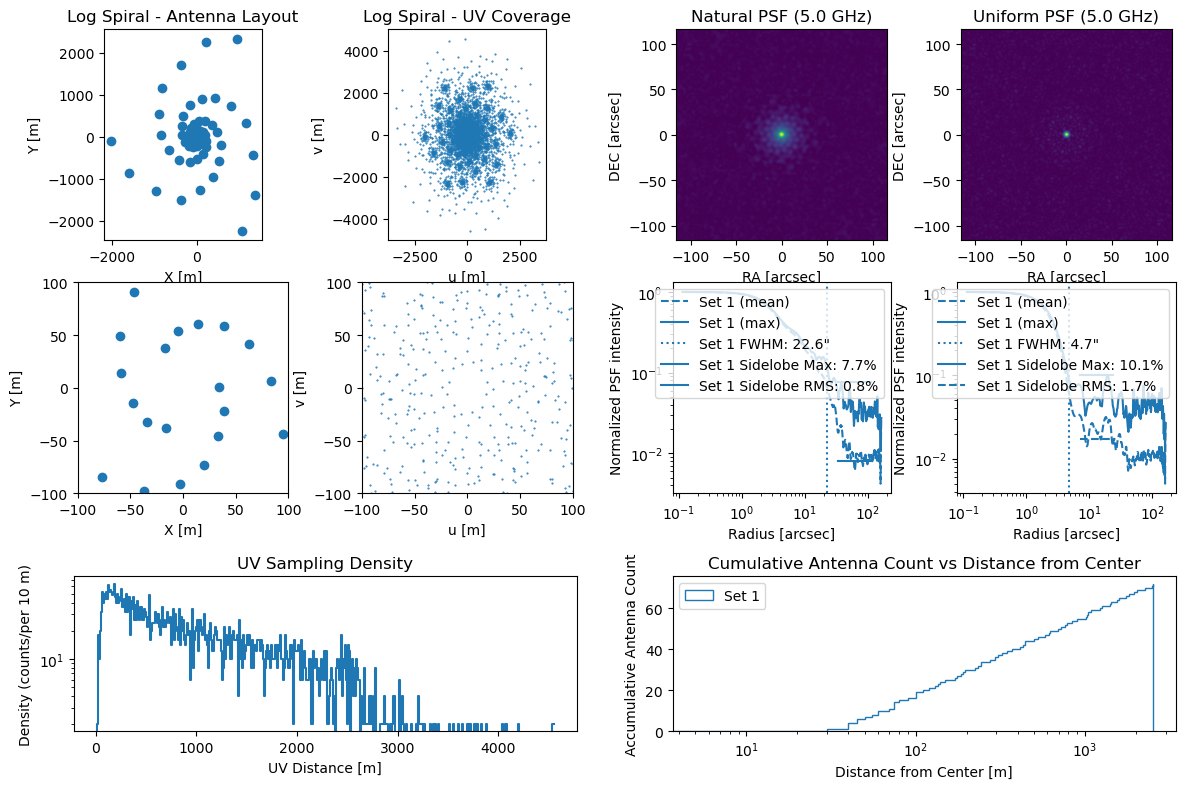

In [73]:
from importlib import reload
reload(fss)
# 72-element spiral with an optimized winding parameter k (corresponding to 1.5 turns), 
#     inner radius of 35 m, and outer radius of 2000 m

# Define log-spiral parameters
array_config = {"n_arms": 3, "antennas_per_arm": 24, "k": 0.43, "r0": 35, "r_max": 2000,
                "latitude": dsa_latitude, "clockwise":True}


positions_logspiral = fss.generate_log_spiral_antenna_positions(**array_config)

figname = (
    f"fig-fasr_Log_Spiral-{len(positions_logspiral)}-"
    f"n_arms={array_config['n_arms']}-antennas_per_arm={array_config['antennas_per_arm']}-"
    f"k={array_config['k']:.2f}-"
    f"r0={array_config['r0']:.1f}-r_max={array_config['r_max']:.0f}.jpg")
print(f'fig saved to {figname}')
figsubfolder = figname.rstrip('.jpg')
formatted_params = [
    rf"$n_{{\rm arms}}={array_config['n_arms']}$",
    rf"$\mbox{{antennas per arm}}={array_config['antennas_per_arm']}$",
    rf"$k={array_config['k']:.2f}$",
    rf"$r_0={array_config['r0']:.1f}\,\mbox{{m}}$",
    rf"$r_{{\rm max}}={array_config['r_max']:.0f}\,\mbox{{m}}$"
]

# Create a full string that also includes the spiral equation.
array_config_str = (
    rf"$n_{{arms}}={array_config['n_arms']}, "
    rf"n_{{perarm}}={array_config['antennas_per_arm']}, "
    rf"k={array_config['k']:.2f}, "
    rf"r_0={array_config['r0']:.1f}\,m, r_{{max}}={array_config['r_max']:.0f}\,m$"
)
fss.plot_all_panels(positions_logspiral, "Log Spiral", frequency=5, figname=figname, plot_psf_fit=False)
# fig = plt.gcf()
# ax = fig.axes[0]
# ax.set_xlim(-10,10)
# ax.set_ylim(-10,10)

## Generate a hybrid array with a 72-element spiral and a dense random core

Generating spiral with 3 arms, 24 antennas per arm
Total spiral antennas: 72
Adjusted core antennas to: 48
Generated 48 core antennas
Minimum baseline length: 1.8 m
Maximum baseline length: 4494.8 m
fig saved to fig-fasr-a-hybrid-120-n_core=48-sigma_g=15.2-n_turns=1.5-r_start=35.0-r_max=2000.jpg
Set 1: Beam (Natural) FWHM Major: 47.94 arcsec, Minor: 47.06"
Set 1: Beam (Uniform) FWHM Major: 4.68 arcsec, Minor: 4.81"
Set 1: Sidelobe RMS (Natural): 3.2%
Set 1: Sidelobe RMS (Uniform): 1.5%
'plot_all_panels' completed at 2026-01-29 10:06:56; runtime: 2.45 seconds


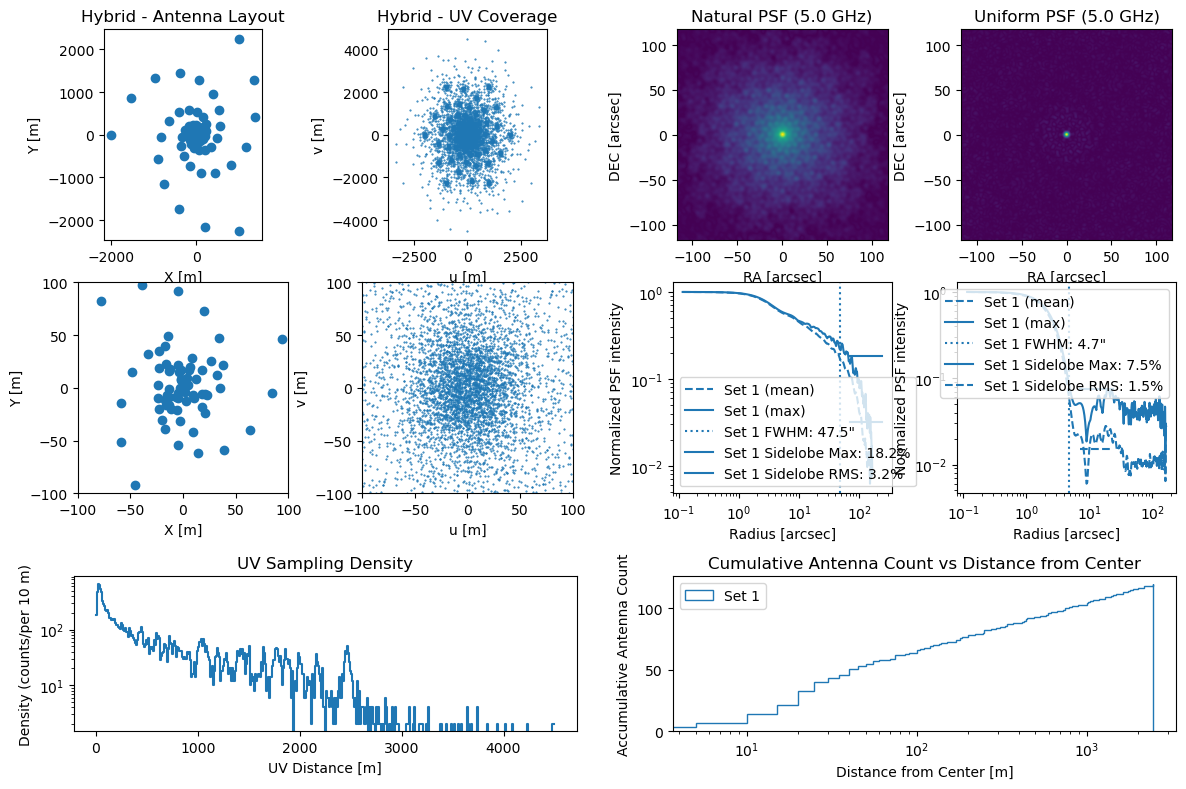

In [75]:
# Define hybrid parameters
reload(fss)
array_config = {"n_antennas": 120, "min_dist": 1.5, "n_core":48,
                                      "r_start": 35.0, "r_max": 2000., "n_turns": 1.5, "rotation_offset": 0., "sigma_g": 15.2,
                                      "latitude": 39.5846}


positions_hybrid = fss.generate_hybrid_rand_spiral_array(**array_config)

figname = (
    f"fig-fasr-a-hybrid-{len(positions_hybrid)}-"
    f"n_core={array_config['n_core']}-sigma_g={array_config['sigma_g']:.1f}-"
    f"n_turns={array_config['n_turns']:.1f}-"
    f"r_start={array_config['r_start']:.1f}-r_max={array_config['r_max']:.0f}.jpg")
print(f'fig saved to {figname}')
fss.plot_all_panels(positions_hybrid, "Hybrid", frequency=5, figname=figname, plot_psf_fit=False)

## Save the configuration for FASR-A hybrid configuration

In [81]:
config_file = f"fasr-a_random_spiral_hybrid_{len(positions_hybrid)}.cfg"
if os.path.exists(config_file):
    print(f'Requested configuration file {config_file} already exists. Adding version number to it.')
    n = 0
    while n < 1000:
        config_filename = config_file.replace('.cfg', f'.00{n+1}.cfg')
        if os.path.exists(config_filename):
            n +=1
        else:
            break
print(f'writing configuration file {config_filename}')
fss.write_casa_antenna_list(config_filename, positions_hybrid, 
                            cofa_lon=dsa_longitude, cofa_lat=dsa_latitude, cofa_alt=dsa_altitude, diam=1.5)

Requested configuration file fasr-a_random_spiral_hybrid_120.cfg already exists. Adding version number to it.
writing configuration file fasr-a_random_spiral_hybrid_120.001.cfg
Wrote fasr-a_random_spiral_hybrid_120.001.cfg


Set 1: Beam (Natural) FWHM Major: 37.50 arcsec, Minor: 37.23"
Set 1: Beam (Uniform) FWHM Major: 3.99 arcsec, Minor: 3.98"
Set 1: Sidelobe RMS (Natural): 1.6%
Set 1: Sidelobe RMS (Uniform): 0.9%
Set 2: Beam (Natural) FWHM Major: 47.62 arcsec, Minor: 47.04"
Set 2: Beam (Uniform) FWHM Major: 4.68 arcsec, Minor: 4.81"
Set 2: Sidelobe RMS (Natural): 3.3%
Set 2: Sidelobe RMS (Uniform): 1.5%
'plot_all_panels' completed at 2026-01-29 10:17:44; runtime: 2.38 seconds


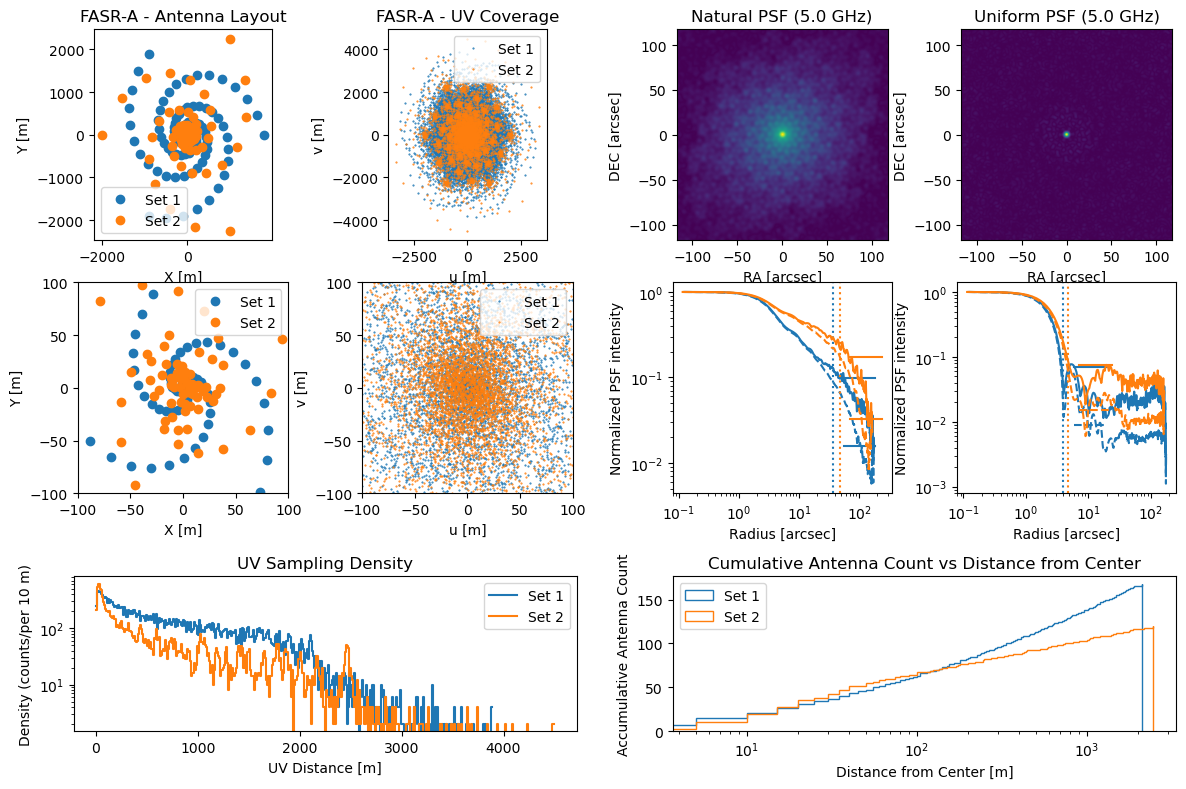

In [82]:
import importlib
importlib.reload(fss)
positions_sy, _ = fss.read_casa_antenna_list('fasr_Log_Spiral-168.cfg')
positions_hybrid, _ = fss.read_casa_antenna_list('fasr-a_random_spiral_hybrid_120.cfg')
fss.plot_all_panels([positions_sy, positions_hybrid], "FASR-A", plot_psf_fit=False, no_psf_legend=True)